##### To run the below code, please use pip:
###### pipenv install - to install all the needed libraries and dependencies
###### pipenv shell - to choose this virtual environment
###### pipenv --rm - to remove the virtual environment/kernel once done

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Opening the Excel file and making a copy to keep the original intact in case of any issues

In [2]:
original = pd.read_csv("./netflix_titles.csv")
raw_data = original.copy()

##### Checking the details of the df

In [3]:
raw_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##### Cleaning Data - Basic steps

###### Dropping the columns that I will not need

In [5]:
raw_data.drop(columns=["title", "cast", "show_id", "release_year", "rating", "duration", "description"], inplace=True)

###### Stripping all the whitespaces and additional commas for string values

In [6]:
for column in raw_data.columns:
    raw_data[column] = raw_data[column].map(lambda x: x.strip(",| ") if type(x) == str else x)

##### Cleaning data - key column

###### Deleting the null values from the key column

In [7]:
raw_data = raw_data[raw_data["date_added"].notna()]

In [8]:
raw_data

,type,director,country,date_added,listed_in
0,Movie,Kirsten Johnson,United States,"September 25, 2021",Documentaries
1,TV Show,NaN,South Africa,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Julien Leclercq,NaN,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,NaN,NaN,"September 24, 2021","Docuseries, Reality TV"
4,TV Show,NaN,India,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...
8802,Movie,David Fincher,United States,"November 20, 2019","Cult Movies, Dramas, Thrillers"
8803,TV Show,NaN,NaN,"July 1, 2019","Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Ruben Fleischer,United States,"November 1, 2019","Comedies, Horror Movies"
8805,Movie,Peter Hewitt,United States,"January 11, 2020","Children & Family Movies, Comedies"


###### adding year, month, and day columns, additionally, changing the datetype of date_added column to date

In [9]:
##Changing the datetype
raw_data["date_added"] = pd.to_datetime(raw_data["date_added"])

##Adding columns
raw_data["year"] = pd.to_datetime(raw_data["date_added"]).dt.year
raw_data["month"] = pd.to_datetime(raw_data["date_added"]).dt.month
raw_data["day"] = pd.to_datetime(raw_data["date_added"]).dt.day

##Checking if everything is correct
print(raw_data["year"].unique())
print(raw_data["month"].unique())
print(raw_data["day"].unique())

raw_data

[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2009 2008 2010]
[ 9  8  7  6  5  4  3  2  1 12 11 10]
[25 24 23 22 21 20 19 17 16 15 14 11 10  9  8  7  6  5  4  3  2  1 31 29
 28 27 26 18 13 12 30]


,type,director,country,date_added,listed_in,year,month,day
0,Movie,Kirsten Johnson,United States,2021-09-25,Documentaries,2021,9,25
1,TV Show,NaN,South Africa,2021-09-24,"International TV Shows, TV Dramas, TV Mysteries",2021,9,24
2,TV Show,Julien Leclercq,NaN,2021-09-24,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
3,TV Show,NaN,NaN,2021-09-24,"Docuseries, Reality TV",2021,9,24
4,TV Show,NaN,India,2021-09-24,"International TV Shows, Romantic TV Shows, TV ...",2021,9,24
...,...,...,...,...,...,...,...,...
8802,Movie,David Fincher,United States,2019-11-20,"Cult Movies, Dramas, Thrillers",2019,11,20
8803,TV Show,NaN,NaN,2019-07-01,"Kids' TV, Korean TV Shows, TV Comedies",2019,7,1
8804,Movie,Ruben Fleischer,United States,2019-11-01,"Comedies, Horror Movies",2019,11,1
8805,Movie,Peter Hewitt,United States,2020-01-11,"Children & Family Movies, Comedies",2020,1,11


###### Changing the order of the columns

In [10]:
raw_data = raw_data[["type", "director", "country", "date_added", "year", "month", "day", "listed_in"]]

##### Revewing the other columns for ease of future analysis

###### Since we want to check the same data for most of the columns, I created a function, that applies to all the string columns. 

###### It takes all the non na values from the column, then checks if the string values are all alphabetical or not, and finally it shows how many rows are there and filters the column with manually typed values that are the most often unknown values

In [11]:
def check(column_name):
    temp = raw_data.loc[raw_data[column_name].notna(), column_name]
    isalpha = temp[temp.str.replace("\W", "", regex=True).str.isalpha()]
    isnotalpha = temp[~temp.str.replace("\W", "", regex=True).str.isalpha()]
    filterout = temp.isin(["N/A", "Not-Applicable", "Not/Applicable", "n/a", "na", "Unknown",
                        "Unknown / Not-Applicable", "Unknown / Non-Applicable", "Unknown/Not-Applicable", 
                        "Unknown/Non-Applicable"]).value_counts()
    return print("--Number of Rows-- \n\n {}".format(temp.shape[0]), "\n\n", 
                 "--Number of Rows (W/o the most commonly used unknown values)-- \n\n {}".format(filterout), "\n\n", 
                 "--Is Alpha-- \n\n {}".format(isalpha), "\n\n", 
                 "--Is Not Alpha-- \n\n {}".format(isnotalpha))

###### Checking the type column. Since there seem to be only 2 types of values, there is no need to apply the function

In [12]:
raw_data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

###### Checking the director column. There are a lot of unique values, so it's best to apply the function.

###### The values appear to be all right, there is 1 non alpha value, however, after checking the name, it appears it is a director

In [13]:
check("director")

--Number of Rows-- 

 6173 

 --Number of Rows (W/o the most commonly used unknown values)-- 

 False    6173
Name: director, dtype: int64 

 --Is Alpha-- 

 0                     Kirsten Johnson
2                     Julien Leclercq
5                       Mike Flanagan
6       Robert Cullen, José Luis Ucha
7                        Haile Gerima
                    ...              
8801                  Majid Al Ansari
8802                    David Fincher
8804                  Ruben Fleischer
8805                     Peter Hewitt
8806                      Mozez Singh
Name: director, Length: 6172, dtype: object 

 --Is Not Alpha-- 

 1053    One9
Name: director, dtype: object


###### Checking the country column. Everything appears to be correct

In [14]:
check("country")

--Number of Rows-- 

 7967 

 --Number of Rows (W/o the most commonly used unknown values)-- 

 False    7967
Name: country, dtype: int64 

 --Is Alpha-- 

 0                                           United States
1                                            South Africa
4                                                   India
7       United States, Ghana, Burkina Faso, United Kin...
8                                          United Kingdom
                              ...                        
8801                         United Arab Emirates, Jordan
8802                                        United States
8804                                        United States
8805                                        United States
8806                                                India
Name: country, Length: 7967, dtype: object 

 --Is Not Alpha-- 

 Series([], Name: country, dtype: object)


###### Reviewing the listed in column. Here also everything appears to be correct

In [15]:
check("listed_in")

--Number of Rows-- 

 8797 

 --Number of Rows (W/o the most commonly used unknown values)-- 

 False    8797
Name: listed_in, dtype: int64 

 --Is Alpha-- 

 0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8797, dtype: object 

 --Is Not Alpha-- 

 Series([], Name: listed_in, dtype: object)


##### Final steps

###### Dividing the table on 2 tables - Movies and TV Shows

In [16]:
raw_data_mov = raw_data[raw_data["type"] == "Movie"]
raw_data_show = raw_data[raw_data["type"] == "TV Show"]

In [17]:
raw_data_mov.head(2)

,type,director,country,date_added,year,month,day,listed_in
0,Movie,Kirsten Johnson,United States,2021-09-25,2021,9,25,Documentaries
6,Movie,"Robert Cullen, José Luis Ucha",NaN,2021-09-24,2021,9,24,Children & Family Movies


In [18]:
raw_data_show.head(2)

,type,director,country,date_added,year,month,day,listed_in
1,TV Show,NaN,South Africa,2021-09-24,2021,9,24,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Julien Leclercq,NaN,2021-09-24,2021,9,24,"Crime TV Shows, International TV Shows, TV Act..."


###### Resetting the indexes for both dataframes

In [19]:
cleaned_show = raw_data_show.reset_index(drop=True)
cleaned_mov = raw_data_mov.reset_index(drop=True)

###### Exporting the dataframes to csv files in case of any issues and for future use

In [20]:
cleaned_show.to_csv("Netflix_Shows.csv")
cleaned_mov.to_csv("Netflix_Movies.csv")

##### Analysis - Movies

###### First, checking how many movies were added in each year

In [21]:
year_to_year_mov = cleaned_mov.groupby("year")[["type"]].agg(
    Number_of_movies = pd.NamedAgg(column="type", aggfunc="count")).sort_values("Number_of_movies", ascending=False)

year_to_year_mov.sort_index(ascending=False)

,Number_of_movies
year,
2021,993
2020,1284
2019,1424
2018,1237
2017,839
2016,253
2015,56
2014,19
2013,6


###### Checking the values in other columns

In [22]:
##Because for the next columns I'm going to follow the same steps, I've created a function

def year_groups_movies(column_name):
    """
    ----IMPORTANT----
    column_name has to be a string, for example "listed_in" not listed_in

    First, we're extracting not na values only
    """
    nona = cleaned_mov[cleaned_mov[column_name].notna()].copy()
    """
    Now, because some movies have multiple values in columns, we will need to use the explode function.
    However, because explode works only on lists and not on strings, we first need to convert the strings to lists.
    Luckily, in this situation, splitting the values is enough to convert them to lists.
    """
    nona[column_name] = nona[column_name].map(lambda x: x.split(", "))
    nonav2 = nona.explode(column_name)
    """
    Then, we're just double checking if there are no na values
    """
    nonav2 = nonav2[nonav2[column_name].notna()]
    """
    With the values exploded we're grouping the values by date and specific column, and count the number of movies 
    """
    number_year = nonav2.groupby(["year", column_name], as_index=False)[["type"]].agg(
    Number_of_movies = pd.NamedAgg(column="type", aggfunc="count"))
    """
    Then, we want to take only the highest number of movies for each year 
    """
    hstnumber_year = number_year.groupby("year",as_index=False)[["Number_of_movies"]].agg(
    Number_of_movies = pd.NamedAgg(column="Number_of_movies", aggfunc="max"))
    """
    Once that is done, we're merging the two dataframes. we're doing that, so that duplicate values will still
    be visible. For example, if the highest number of movies for a particular year for two or more categories
    is the same, we're showing all of these categories, instead of just one.
    """
    result = number_year.merge(hstnumber_year, left_on=["year", "Number_of_movies"], 
    right_on=["year", "Number_of_movies"])
    return result

###### First, I'm taking a look at which categories that had the most movies added in each year

In [23]:
mov_category = year_groups_movies("listed_in")
mov_category

,year,listed_in,Number_of_movies
0,2008,Dramas,1
1,2008,Independent Movies,1
2,2008,Thrillers,1
3,2009,Dramas,1
4,2009,Horror Movies,1
5,2009,International Movies,1
6,2010,Cult Movies,1
7,2010,Horror Movies,1
8,2011,Dramas,13
9,2012,Comedies,2


###### Then I check what was the most common country of production each year

In [24]:
mov_country = year_groups_movies("country")
mov_country

,year,country,Number_of_movies
0,2008,United States,1
1,2009,Denmark,1
2,2009,United States,1
3,2010,United States,1
4,2011,United States,12
5,2012,United States,3
6,2013,United States,5
7,2014,United States,18
8,2015,United States,41
9,2016,United States,139


###### Next, I check which director had the most movies added each year

In [25]:
mov_director = year_groups_movies("director")
mov_director

,year,director,Number_of_movies
0,2008,Sorin Dan Mihalcescu,1
1,2009,Joe Dante,1
2,2009,Ole Bornedal,1
3,2010,Jim Monaco,1
4,2011,Arthur Allan Seidelman,1
5,2011,Buzz Kulik,1
6,2011,Eric Laneuville,1
7,2011,Icíar Bollaín,1
8,2011,Joel Oliansky,1
9,2011,John Herzfeld,1


###### At last, checking the overall top 1 values for movies for country, director, and category

In [26]:
##I've created a function to show top 1 values for each column. Because I'm applying the same
##process to each column, I created a function.
def movies_overall(country, director, category):
    """
        ----IMPORTANT----
    country, director, category have to be the following strings:
    "country", "director", "listed_in"
    """

    """
    The first 4 lines are the same lines that were used in the previous function
    """
    ct = cleaned_mov[cleaned_mov[country].notna()].copy()
    ct[country] = ct[country].map(lambda x: x.split(", "))
    ctv2 = ct.explode(country)
    ctv2 = ctv2[ctv2[country].notna()]
    """
    Once we have the table, we can group it by a specific column, reset the index
    and then choose only these rows with the maximum value in the "No" column 
    """
    f_ct = ctv2.groupby(country)[["type"]].agg(No = pd.NamedAgg(column="type", aggfunc="count")
                                             ).reset_index()
    f_ct = f_ct[f_ct["No"] == f_ct["No"].max()]


    """
    The same process as above applies to the other 2 columns
    """
    dir = cleaned_mov[cleaned_mov[director].notna()].copy()
    dir[director] = dir[director].map(lambda x: x.split(", "))
    dirv2 = dir.explode(director)
    dirv2 = dirv2[dirv2[director].notna()]
    f_dir = dirv2.groupby(director)[["type"]].agg(No = pd.NamedAgg(column="type", aggfunc="count")
                                             ).reset_index()
    f_dir = f_dir[f_dir["No"] == f_dir["No"].max()]


    cat = cleaned_mov[cleaned_mov[category].notna()].copy()
    cat[category] = cat[category].map(lambda x: x.split(", "))
    catv2 = cat.explode(category)
    catv2 = catv2[catv2[category].notna()]
    f_cat = catv2.groupby(category)[["type"]].agg(No = pd.NamedAgg(column="type", aggfunc="count")
                                             ).reset_index()
    f_cat = f_cat[f_cat["No"] == f_cat["No"].max()]

    return print("--The Most Common Country--\n\n {}".format(f_ct), "\n\n",
                 "--The Most Common Director--\n\n {}".format(f_dir), "\n\n",
                 "--The Most Common Category--\n\n {}".format(f_cat))

In [27]:
movies_overall("country", "director", "listed_in")

--The Most Common Country--

            country    No
110  United States  2752 

 --The Most Common Director--

            director  No
3582  Rajiv Chilaka  22 

 --The Most Common Category--

                listed_in    No
11  International Movies  2752


##### Analysis - TV Shows. The process is the same as with the movies dataframe

###### First, checking how many tv shows were added in each year

In [28]:
year_to_year_show = cleaned_show.groupby("year")[["type"]].agg(
    Number_of_shows = pd.NamedAgg(column="type", aggfunc="count")).sort_values("Number_of_shows", ascending=False)

year_to_year_show.sort_index(ascending=False)

,Number_of_shows
year,
2021,505
2020,595
2019,592
2018,412
2017,349
2016,176
2015,26
2014,5
2013,5


###### Modifying the previous function so that it refers to the shows dataframe

In [29]:
##Using the same functions as for Movies

def year_groups_shows(column_name):
    nona = cleaned_show[cleaned_show[column_name].notna()].copy()
    nona[column_name] = nona[column_name].map(lambda x: x.split(", "))
    nonav2 = nona.explode(column_name)
    nonav2 = nonav2[nonav2[column_name].notna()]
    number_year = nonav2.groupby(["year", column_name], as_index=False)[["type"]].agg(
    Number_of_shows = pd.NamedAgg(column="type", aggfunc="count"))
    hstnumber_year = number_year.groupby("year",as_index=False)[["Number_of_shows"]].agg(
    Number_of_shows = pd.NamedAgg(column="Number_of_shows", aggfunc="max"))
    result = number_year.merge(hstnumber_year, left_on=["year", "Number_of_shows"], 
    right_on=["year", "Number_of_shows"])
    return result

###### First, I'm taking a look at which categories that had the most movies added in each year

In [30]:
show_category = year_groups_shows("listed_in")
show_category

,year,listed_in,Number_of_shows
0,2008,Stand-Up Comedy & Talk Shows,1
1,2013,TV Dramas,4
2,2014,TV Comedies,3
3,2014,TV Dramas,3
4,2015,Kids' TV,9
5,2016,International TV Shows,86
6,2017,International TV Shows,205
7,2018,International TV Shows,214
8,2019,International TV Shows,335
9,2020,International TV Shows,277


###### Then I check what was the most common country of production each year

In [31]:
show_country = year_groups_shows("country")
show_country

,year,country,Number_of_shows
0,2008,United States,1
1,2013,United States,5
2,2014,United States,4
3,2015,United States,16
4,2016,United States,64
5,2017,United States,98
6,2018,United States,145
7,2019,United States,178
8,2020,United States,246
9,2021,United States,175


###### Next, I check which director had the most movies added each year

In [32]:
show_director = year_groups_shows("director")
show_director

,year,director,Number_of_shows
0,2013,Stuart Orme,1
1,2015,Alastair Fothergill,2
2,2016,Alastair Fothergill,1
3,2016,David Schalko,1
4,2016,Ehtesham Uddin,1
...,...,...,...
126,2020,Vijay S. Bhanushali,1
127,2020,Wouter Bouvijn,1
128,2020,Ziad Doueiri,1
129,2021,Hsu Fu-chun,2


###### At last, checking the overall top 1 values for tv shows for country, director, and category

In [33]:
##I'm using the same function for the overall values as previously, only the source dataframe was changed from
##cleaned_mov to cleaned_show
def shows_overall(country, director, category):
    ct = cleaned_show[cleaned_show[country].notna()].copy()
    ct[country] = ct[country].map(lambda x: x.split(", "))
    ctv2 = ct.explode(country)
    ctv2 = ctv2[ctv2[country].notna()]
    f_ct = ctv2.groupby(country)[["type"]].agg(No = pd.NamedAgg(column="type", aggfunc="count")
                                             ).reset_index()
    f_ct = f_ct[f_ct["No"] == f_ct["No"].max()]


    dir = cleaned_show[cleaned_show[director].notna()].copy()
    dir[director] = dir[director].map(lambda x: x.split(", "))
    dirv2 = dir.explode(director)
    dirv2 = dirv2[dirv2[director].notna()]
    f_dir = dirv2.groupby(director)[["type"]].agg(No = pd.NamedAgg(column="type", aggfunc="count")
                                             ).reset_index()
    f_dir = f_dir[f_dir["No"] == f_dir["No"].max()]


    cat = cleaned_show[cleaned_show[category].notna()].copy()
    cat[category] = cat[category].map(lambda x: x.split(", "))
    catv2 = cat.explode(category)
    catv2 = catv2[catv2[category].notna()]
    f_cat = catv2.groupby(category)[["type"]].agg(No = pd.NamedAgg(column="type", aggfunc="count")
                                             ).reset_index()
    f_cat = f_cat[f_cat["No"] == f_cat["No"].max()]

    return print("--The Most Common Country--\n\n {}".format(f_ct), "\n\n",
                 "--The Most Common Director--\n\n {}".format(f_dir), "\n\n",
                 "--The Most Common Category--\n\n {}".format(f_cat))

In [34]:
shows_overall("country", "director", "listed_in")

--The Most Common Country--

           country   No
62  United States  932 

 --The Most Common Director--

                 director  No
8    Alastair Fothergill   3
146            Ken Burns   3 

 --The Most Common Category--

                 listed_in    No
5  International TV Shows  1350


##### Visualizations

###### Charts showing the change in the number of movies and TV shows added year after year

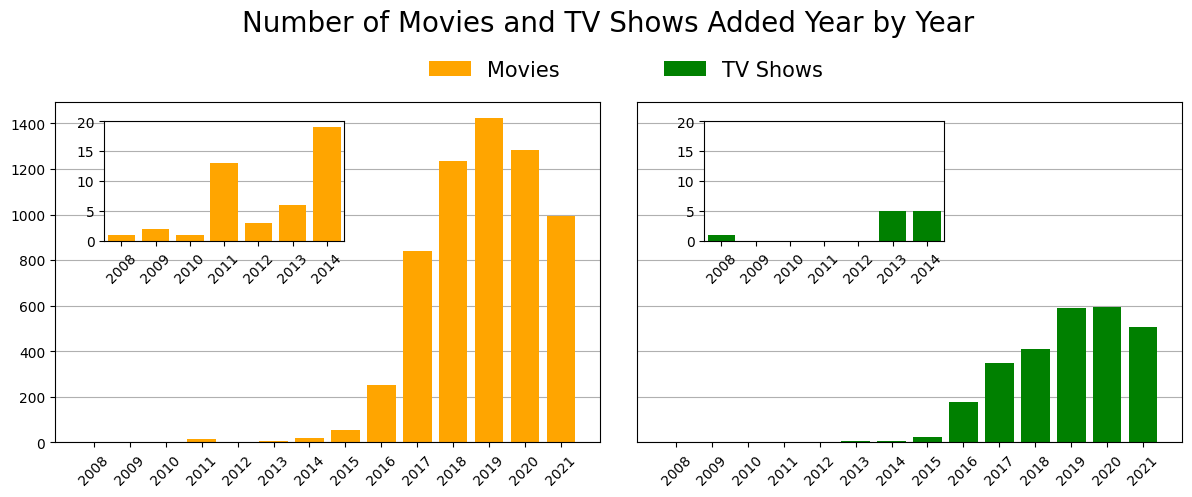

In [38]:
##First, I'm creating subplots, and adjusting the figure size and layout, as well as making sure that both plots have
##the same x and y axis values
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True, sharex=True)
fig.tight_layout()
fig.suptitle("Number of Movies and TV Shows Added Year by Year", y=1.18, fontsize=20)

##Now I'm plotting the bar chart and modifying the ticks as the default ones where not the best
##I also turn on the grid and set it below the bars
ax[0].bar(year_to_year_mov.index, year_to_year_mov["Number_of_movies"], color="orange", label="Movies")
ax[0].set_xticks(year_to_year_mov.index)
ax[0].set_xticklabels(year_to_year_mov.index,rotation=45)
ax[0].grid(visible=True, which="major", axis="y")
ax[0].set_axisbelow(True)

##I'm zooming in on the 2008-2014 years to show the small values.
ax0zoom = fig.add_axes([0.08,0.6,0.2,0.3])
ax0zoom.bar(year_to_year_mov.index, year_to_year_mov["Number_of_movies"], color="orange")
ax0zoom.set_xticks(ax[0].get_xticks())
ax0zoom.set_xticklabels(ax[0].get_xticks(), rotation=45)
ax0zoom.set_xlim(2007.5,2014.5)
ax0zoom.set_ylim(0,20)
ax0zoom.grid(visible=True, which="major", axis="y")
ax0zoom.set_axisbelow(True)

##I do the same process for the second graph with an additional tick_params function, to delete the ticks
ax[1].bar(year_to_year_show.index, year_to_year_show["Number_of_shows"], color="green", label="TV Shows")
ax[1].tick_params(axis="y", left=False)
ax[1].grid(visible=True, which="major", axis="y")
ax[1].set_axisbelow(True)
ax[1].set_xticklabels(ax[0].get_xticks() ,rotation=45)

##As above, I'm zooming in on the 2008-2014 years to show the small values.
ax1zoom = fig.add_axes([0.58,0.6,0.2,0.3])
ax1zoom.bar(year_to_year_show.index, year_to_year_show["Number_of_shows"], color="green")
ax1zoom.set_xticks(ax[0].get_xticks())
ax1zoom.set_xticklabels(ax[0].get_xticks(), rotation=45)
ax1zoom.set_xlim(2007.5,2014.5)
ax1zoom.set_ylim(0,20)
ax1zoom.grid(visible=True, which="major", axis="y")
ax1zoom.set_axisbelow(True)

##Here, I'm just adjusting the legend and showing the graph
fig.legend(ncols=2, fontsize=15, frameon=False, loc="upper center", bbox_to_anchor=(0.515,1.1), columnspacing=5)
plt.show();

###### Charts showing the most common country(ies) of film and TV shows year after year

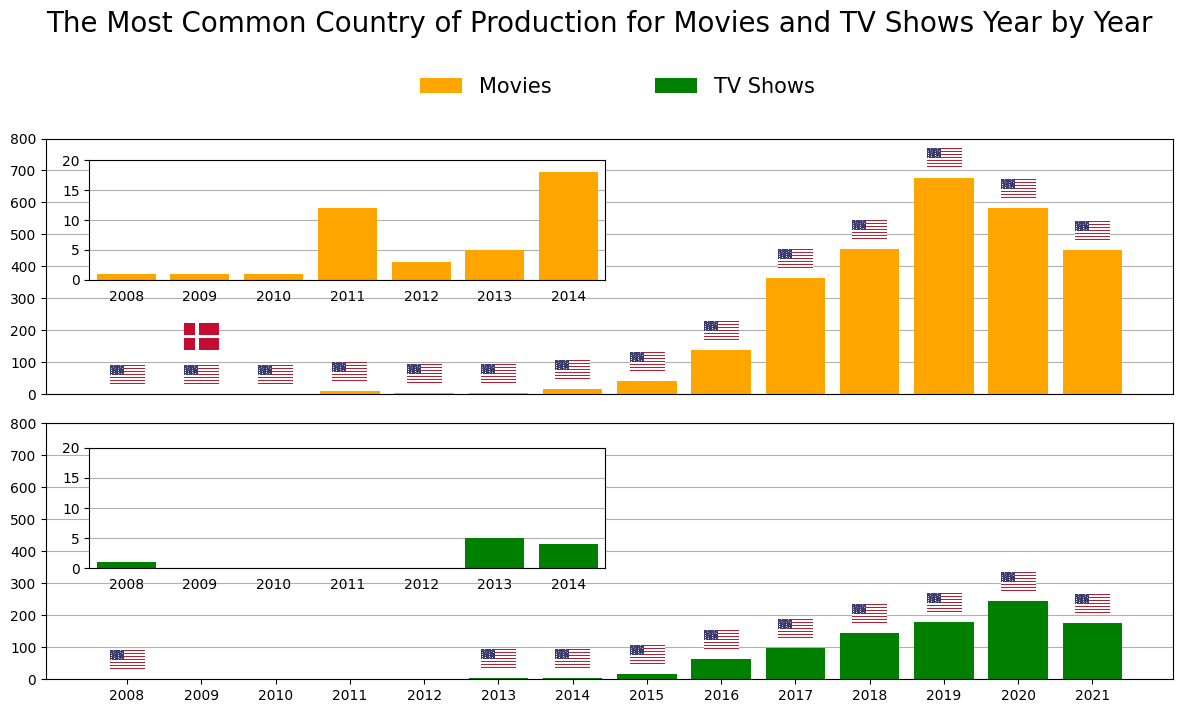

In [36]:
##First, to do what I want, we need to import two additional modules
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

##I'm creating subplots, and adjusting the figure size and layout, as well as making sure that both plots have
##the same x and y axis values
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,6), sharex=True, sharey=True)
fig.tight_layout()
fig.suptitle("The Most Common Country of Production for Movies and TV Shows Year by Year", y=1.18, fontsize=20)

##Now I'm plotting the bar chart and modifying the ticks as the default ones where not the best
##I also turn on the grid and set it below the bars
ax[0].bar(mov_country["year"], mov_country["Number_of_movies"], color="orange", label="Movies")
ax[0].set_xticks(mov_country["year"])
ax[0].set_ylim(0,800)
ax[0].set_xticks(mov_category["year"].unique())
ax[0].set_xticklabels(mov_category["year"].unique())
ax[0].grid(visible=True, which="major", axis="y")
ax[0].set_axisbelow(True)
ax[0].tick_params(axis="x", bottom=False)

##I'm zooming in on the 2008-2014 years to show the small values.
ax0zoom = fig.add_axes([0.075,0.73,0.43,0.2])
ax0zoom.bar(mov_country["year"], mov_country["Number_of_movies"], color="orange")
ax0zoom.set_xticks(ax[0].get_xticks())
ax0zoom.set_xticklabels(ax[0].get_xticks())
ax0zoom.tick_params(axis="x", bottom=False)
ax0zoom.set_xlim(2007.5,2014.5)
ax0zoom.set_ylim(0,20)
ax0zoom.grid(visible=True, which="major", axis="y")
ax0zoom.set_axisbelow(True)

##Because I want to show flags of the countries from the table, we need to use our two imported modules
##I added them to a function, so it can later be used in a for loop
##We read the image based on the file name which is country name
##Then, we use the OffsetImage module, so we can manipulate how big are the images
##Next, we make sure that the loaded image is actually placed on the graph in a correct position
##based on the x and y axis of the graph.
##Finally, we add this image to the axes
def OffsetandAnnotation(x, y, country, ax):
    """
    The name has to be in quotation marks, for example "Denmark" instead of Denmark
    """
    image = plt.imread("./{}.jpg".format(country))
    img = OffsetImage(image, zoom=0.025)
    Annotation = AnnotationBbox(img, (x, y+60), frameon=False)
    ax.add_artist(Annotation)

##After creating the function we make a for loop, so that we don't have to manually add the images to all the bars
##We zip all the values together and iterate over each row using our function
for idx, (label, value, country) in enumerate(zip(mov_country["year"], mov_country["Number_of_movies"], 
                                          mov_country["country"])):
    if country == "United States":
        OffsetandAnnotation(label, value, country, ax=ax[0])
    else:
        OffsetandAnnotation(label, value+120, country, ax=ax[0])


##Now, we are plotting the second bar chart, and the process is the same as previously
ax[1].bar(show_country["year"], show_country["Number_of_shows"], color="green", label="TV Shows")
ax[1].set_ylim(0,800)
ax[1].set_xticklabels(ax[0].get_xticks())
ax[1].grid(visible=True, which="major", axis="y")
ax[1].set_axisbelow(True)

##I'm zooming in on the 2008-2014 years to show the small values.
ax1zoom = fig.add_axes([0.075,0.25,0.43,0.2])
ax1zoom.bar(show_country["year"], show_country["Number_of_shows"], color="green")
ax1zoom.set_xticks(ax[0].get_xticks())
ax1zoom.set_xticklabels(ax[0].get_xticks())
ax1zoom.tick_params(axis="x", bottom=False)
ax1zoom.set_xlim(2007.5,2014.5)
ax1zoom.set_ylim(0,20)
ax1zoom.grid(visible=True, which="major", axis="y")
ax1zoom.set_axisbelow(True)

##We do the same for loop as before, but using the tv shows table
for idx, (label, value, country) in enumerate(zip(show_country["year"], show_country["Number_of_shows"], 
                                                show_country["country"])):
    if country == "United States":
        OffsetandAnnotation(label, value, country, ax=ax[1])
    else:
        OffsetandAnnotation(label, value+100, country, ax=ax[1])

##Here, I'm just adjusting the legend and showing the graph
fig.legend(ncols=2, fontsize=15, frameon=False, loc="upper center", bbox_to_anchor=(0.515,1.1), columnspacing=5)
plt.show();